# Schizophrenia and Bipolar Disorder Classification

Problem Statement: 
Use ML tools to classify between Schizophrenia and Bipolar Disorder using the dataset in Dataset folder on your google drive. 

The dataset is in the form of a pickle file (dictionary file). 
It has 6 feature keys - ALFF, fALFF, .... - and for each feature, 14 different atlas keys - AAL, Power, ..... 

For your task, you'll be using only the ReHo feature key, and its 14 corresponding atlas keys to classify between Schizophrenia and Bipolar Disorder with >70% accuracy.

# Loading Google drive link.


In [ ]:
!pip uninstall statsmodels
!pip install statsmodels

Restart Runtime after this

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_pickle("/content/drive/My Drive/Datasets/Schizophrenia and Bipolar Disorder Classification/schizophrenia-45_bipolar-disorder-42_multidict_file.pkl")

# Go to ReHo dataset

In [4]:
df = dataset.get('_ReHo_sz_test_')

In [5]:
df.get("aal").shape

(87, 116)

In [6]:
for i,x in enumerate(df):
  l = df.get(x)
  try:
     print(i, x, [len(l), len(l[0])] )
  except:
      print(i, x, [len(l)] )


0 aal [87, 116]
1 harvard_sub_25 [87, 22]
2 harvard_cort_25 [87, 96]
3 destrieux [87, 148]
4 yeo [87, 17]
5 basc_multiscale_122 [87, 122]
6 basc_multiscale_197 [87, 197]
7 basc_multiscale_325 [87, 325]
8 basc_multiscale_444 [87, 444]
9 power [87, 264]
10 dosenbach [87, 160]
11 smith20 [87, 20]
12 msdl [87, 39]
13 smith70 [87, 70]
14 Group_Code [87, 9]
15 UIC_No [87, 9]
16 diag_label [87, 13]
17 diag_Code [87]
18 sub_idx [87]


In [7]:
X = df.get('aal')
a = pd.DataFrame(X).transpose()
y = pd.Series(df.get('diag_Code'), name = 'diag_Code')


In [8]:
dataset = a.transpose().join(y, how="inner")
X = dataset.drop('diag_Code', axis= 1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,0.903504,-1.379881,1.815419,0.692680,3.219530,1.762107,1.002799,-1.537369,2.796549,0.593156,-0.255145,-2.527846,1.216521,-1.954173,3.158594,0.682909,-1.125890,-3.486496,-0.572924,-0.489566,2.271910,1.970850,0.654350,1.198993,1.852338,2.058460,2.447902,2.860240,0.170609,-3.189064,-0.076566,0.101435,-3.019396,-3.840099,-2.266207,-2.497234,1.306596,-1.818076,0.649514,-0.711509,...,-1.590754,-2.055499,-0.338335,-2.074032,1.068368,-2.211615,1.486702,-0.766578,1.607996,-3.150339,0.182743,-0.325924,3.416064,0.800033,1.229340,-0.058942,1.376947,0.588287,0.631782,-0.295491,-0.547145,-1.670376,0.092478,-1.340845,1.942557,0.378799,2.169678,1.125459,1.377373,1.705051,0.726210,1.139279,0.272070,-0.366589,-1.331913,-0.984530,0.060450,1.089321,0.030443,0.002744
1,-1.005250,-0.774012,0.297203,0.567038,-1.553331,2.111693,0.099713,-0.396241,-0.456515,1.884615,0.053794,0.694751,-0.233670,0.277691,0.492492,0.197456,0.372023,0.567832,0.492808,1.240741,-0.292228,1.023248,1.865757,1.119135,-0.889321,-1.299834,-1.373710,-0.191514,-1.253117,0.937337,1.580214,1.032260,3.396746,3.421665,2.736670,1.789535,1.085319,0.268563,0.857363,-0.616249,...,0.908819,-0.425550,0.752101,1.767480,0.222950,-0.265223,0.613497,-1.332714,-0.505441,0.943603,1.851475,0.569340,-0.073796,1.651536,-0.510472,-0.039267,-0.255629,0.234409,-0.477560,-0.091747,0.214220,-0.738331,-0.311251,0.890055,-0.359844,0.842562,-0.061958,0.958803,0.080446,-0.808424,0.353605,-1.609424,-0.520662,1.546322,0.893820,0.352795,-0.259075,1.498940,1.809240,0.952663
2,-0.570857,0.659692,-0.606319,-0.922331,-0.181489,-0.669323,0.116768,-0.543971,-0.314008,-0.697251,-0.075673,0.683390,-0.147586,0.520724,-0.031966,-0.642244,0.154361,0.324440,-0.015973,-0.926121,-0.599857,-0.093675,0.623150,-0.614754,0.073104,-0.467231,-0.773465,-0.761976,-0.262380,0.909204,0.017039,1.220186,1.799216,1.397674,2.207531,2.049861,0.404792,2.200704,-0.664651,0.958330,...,1.731633,1.814651,0.672942,1.581363,0.165341,0.358127,-0.583133,-0.222501,0.178766,-0.498480,0.579855,-0.143496,0.460771,-0.523263,-0.869717,1.096581,-0.852295,-0.539188,-1.188667,0.006937,0.744506,1.754389,1.170349,1.472925,-0.834385,-0.705218,0.598141,-0.475575,0.764645,0.481729,0.177472,0.751029,-0.546000,-0.652858,1.430395,2.211405,0.890957,0.238494,1.140568,0.228872
3,2.136987,0.391177,1.662034,0.496431,0.327838,-1.019523,0.703860,0.978327,0.115359,-0.414599,0.405612,-0.298265,0.829553,-0.606347,-0.580319,-0.308852,1.083191,0.408381,0.829244,1.129986,-0.512760,-0.323033,-0.640646,0.558617,-0.699157,-0.590015,-0.699474,-0.151121,-0.085373,0.177244,-0.563481,-0.552638,0.490241,0.789883,1.422918,1.493045,-0.300187,-0.277215,-0.882102,-0.600840,...,1.087104,1.447307,0.089668,-0.076284,-0.540646,-0.473127,-0.145776,-2.068941,-1.029554,-1.087844,-0.986421,-1.754539,-0.388168,-0.651338,0.456621,-1.542705,-0.031945,-1.367026,1.402736,-0.718951,-0.165714,-0.003140,0.086305,-0.128736,1.082792,-0.890047,0.591032,-0.060478,0.225874,0.830467,0.487542,0.763281,1.424589,0.957192,0.505905,0.591134,0.148477,-0.077423,1.123010,0.899605
4,-1.057269,-1.272483,1.042172,0.293039,0.152190,0.489288,1.309904,-0.029723,0.527069,1.120779,-1.050842,0.219766,-0.193377,1.751008,-0.023067,1.201970,-1.209234,-0.256214,0.078142,0.065287,-1.358339,-1.020540,2.362678,1.541697,-0.139888,-0.272272,-0.332100,-0.212778,-1.032418,0.054423,0.349978,0.427400,-0.348927,0.405871,-0.972370,0.257894,0.288751,-0.164638,-0.159304,0.292241,...,-0.211745,-0.317152,-1.183365,1.185431,-1.267223,0.453435,-1.451129,-0.684823,1.207672,3.182414,-0.670057,-0.930356,-0.494449,0.751487,-1.098554,-1.280458,-0.960031,-0.809254,1.316743,0.161259,0.763435,0.723464,-0.727163,-0.580504,-0.039703,-0.604332,0.729800,-0.104900,0.181665,1.259158,-1.701710,-0.943340,0.511244,0.

# Visualizing aal Dataset

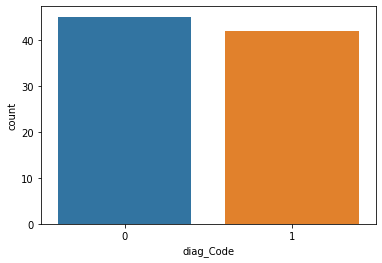

In [ ]:
sns.countplot(x = 'diag_Code', data=dataset)

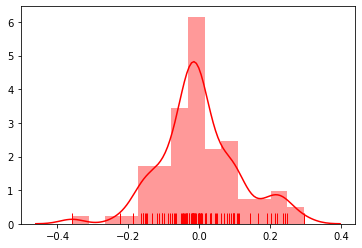

In [ ]:
mean_readings = X.mean(axis=1)
sns.distplot(mean_readings, rug=True, color= "red")

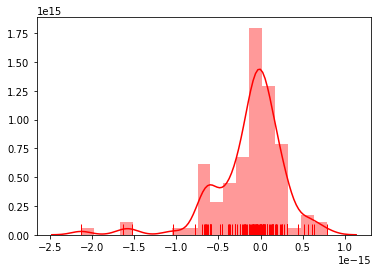

In [ ]:
mean_feature = X.mean(axis=0)
sns.distplot(mean_feature, rug=True, color= "red")

This shows aal parcellations reperesent left skewness in the fMRI Data

This shows that negative values will contribute to the classification


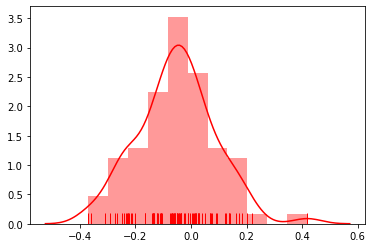

In [ ]:
median_readings = X.median(axis=1)
sns.distplot(median_readings, rug=True, color= "red")

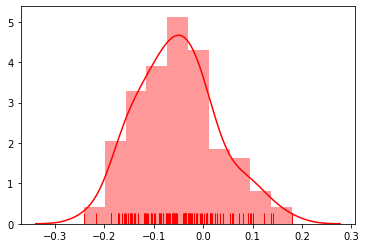

In [ ]:
median_feature = X.median(axis=0)
sns.distplot(median_feature, rug=True, color= "red")

# Statistical Models on aal Dataset.


In [28]:
import statsmodels.api as sta

In [29]:
model = sta.OLS(y, X)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              diag_Code   R-squared (uncentered):                   0.446
Model:                            OLS   Adj. R-squared (uncentered):             -8.638
Method:                 Least Squares   F-statistic:                            0.04911
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                        1.00
Time:                        18:28:16   Log-Likelihood:                         -66.072
No. Observations:                  87   AIC:                                      296.1
Df Residuals:                       5   BIC:                                      498.3
Df Model:                          82                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared value is 0.446 and Adjusted R-squared is -ve, this means that a lot of the features are unimportant. 

We also understand that the features have explained very less variability. 

In [30]:
from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, DictionaryLearning

In [31]:
pca_SBD = PCA(n_components=4)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [32]:
model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              diag_Code   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              1.452
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                       0.224
Time:                        18:28:22   Log-Likelihood:                         -88.827
No. Observations:                  87   AIC:                                      185.7
Df Residuals:                      83   BIC:                                      195.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
pca_SBD = PCA(0.9)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)
print(pca_df.shape)

model = sta.OLS(y, pca_df.values[:,:10]) 

## using OLS on first 10 features Principal components only explain 10.2 % data variability

results = model.fit()

print(results.summary())

(87, 35)
                                 OLS Regression Results                                
Dep. Variable:              diag_Code   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):             -0.026
Method:                 Least Squares   F-statistic:                             0.7768
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                       0.651
Time:                        18:28:24   Log-Likelihood:                         -87.589
No. Observations:                  87   AIC:                                      195.2
Df Residuals:                      77   BIC:                                      219.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# Train Test Split

In [34]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [36]:
type(X_train)

pandas.core.frame.DataFrame

# Linear and Logistic Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[2 6]
 [3 7]]
                  precision    recall  f1-score   support

   Schizophrenia       0.40      0.25      0.31         8
Bipolar Disorder       0.54      0.70      0.61        10

        accuracy                           0.50        18
       macro avg       0.47      0.47      0.46        18
    weighted avg       0.48      0.50      0.47        18

Accuracy Score:  0.5


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[5 3]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.45      0.62      0.53         8
Bipolar Disorder       0.57      0.40      0.47        10

        ac

# Tree Classifiers

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf = dt.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf = rf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)
[[2 6]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.25      0.25         8
Bipolar Disorder       0.40      0.40      0.40        10

        accuracy                           0.33        18
       macro avg       0.33      0.33      0.33        18
    weighted avg       0.33      0.33      0.33        18

Accuracy Score:  0.3333333333333333


 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                    

# Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[1 7]
 [1 9]]
                  precision    recall  f1-score   support

   Schizophrenia       0.50      0.12      0.20         8
Bipolar Disorder       0.56      0.90      0.69        10

        accuracy                           0.56        18
       macro avg       0.53      0.51      0.45        18
    weighted avg       0.53      0.56      0.47        18

Accuracy Score:  0.5555555555555556


 AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)
[[6 2]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.50      0.75      0.60         8
Bipolar Disorder       0.67      0.40      0.50        10

 

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[[2 6]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.25      0.25         8
Bipolar Disorder       0.40      0.40      0.40        10

        accuracy                           0.33        18
       macro avg       0.33      0.33      0.33        18
    weighted avg       0.33      0.33      0.33        18

KNeighborsClassifier Accuracy Score:  0.3333333333333333


# Performing regression analysis and Classification on other parcellations

In [39]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


names = ['Schizophrenia','Bipolar Disorder']


In [90]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
print(sss.get_n_splits(X, y))

print(sss)

for train_index, test_index in sss.split(X, y):
    print(train_index)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)


    lr = LinearRegression()
    clf = lr.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    y_hat = y_hat > 0
    model_names.append(lr.__class__.__name__)
    accuracy.append(accuracy_score(y_test, y_hat))
    print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))


5
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
[5 2 3]
TRAIN: [5 2 3] TEST: [4 1 0]
(3, 2) (3,)
(3, 2) (3,)
LinearRegression Accuracy Score:  0.3333333333333333
[5 1 4]
TRAIN: [5 1 4] TEST: [0 2 3]
(3, 2) (3,)
(3, 2) (3,)
LinearRegression Accuracy Score:  0.3333333333333333
[5 0 2]
TRAIN: [5 0 2] TEST: [4 3 1]
(3, 2) (3,)
(3, 2) (3,)
LinearRegression Accuracy Score:  0.3333333333333333
[4 1 0]
TRAIN: [4 1 0] TEST: [2 3 5]
(3, 2) (3,)
(3, 2) (3,)
LinearRegression Accuracy Score:  0.0
[0 5 1]
TRAIN: [0 5 1] TEST: [3 4 2]
(3, 2) (3,)
(3, 2) (3,)
LinearRegression Accuracy Score:  0.6666666666666666


In [58]:
model_names = list()
accuracy = list()

for i, nm in enumerate(df):
  if i > 13:
    pass
  else:
    print(i, nm)
    X = df.get(nm)
    y = np.array(df.get('diag_Code'))
    print(X.shape, y.shape)
    X = np.array(X)

    # Strafied Shuffle Split
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

    for train_index, test_index in sss.split(X, y):
      sss.get_n_splits()
      print("TRAIN:", train_index[1:5], "TEST:", test_index[1:5])
      X_train, X_test = X[:][train_index], X[:][test_index]
      y_train, y_test = y[train_index], y[test_index]
      print(X_train.shape, y_train.shape)
      print(X_test.shape, y_test.shape)



      lr = LinearRegression()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = LogisticRegression()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = LogisticRegressionCV()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = DecisionTreeClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = RandomForestClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = GradientBoostingClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = KMeans()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = AgglomerativeClustering()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.fit_predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = SpectralClustering()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.fit_predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))


      lr = KNeighborsClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

0 aal
(87, 116) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.4318181818181818
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5227272727272727
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.3409090909090909
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.4090909090909091
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 116) (43,)
(44, 116) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
1 harvard_sub_25
(87, 22) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.45454545454545453
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.38636363636363635
GradientBoostingClassifier Accuracy Score:  0.4090909090909091
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4318181818181818
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.45454545454545453
GradientBoostingClassifier Accuracy Score:  0.45454545454545453
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.5681818181818182
KNeighborsClassifier Accuracy Score:  0.45454545454545453
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.5454545454545454
AgglomerativeClustering Accuracy Score:  0.38636363636363635
SpectralClustering Accuracy Score:  0.36363636363636365
KNeighborsClassifier Accuracy Score:  0.5
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.4318181818181818
LogisticRegression Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.5
GradientBoostingClassifier Accuracy Score:  0.4318181818181818
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.38636363636363635
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.4090909090909091
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.36363636363

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.4318181818181818
GradientBoostingClassifier Accuracy Score:  0.36363636363636365
KMeans Accuracy Score:  0.5909090909090909
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.4318181818181818
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.4090909090909091
LogisticRegressionCV Accuracy Score:  0.4772727272727273
GradientBoostingClassifier Accuracy Score:  0.38636363636363635
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.4090909090909091
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 22) (43,)
(44, 22) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.38636363636363635
GradientBoostingClassifier Accuracy Score:  0.4318181818181818
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.4318181818181818
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighb

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.4772727272727273
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
2 harvard_cort_25
(87, 96) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.6818181818181818
SpectralClustering Accuracy Score:  0.6136363636363636
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.36363636363636365
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.75
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.75
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.8181818181818182
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6818181818181818


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.3181818181818182
AgglomerativeClustering Accuracy Score:  0.25
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 96) (43,)
(44, 96) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.7045454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.7045454545454546
3 destrieux
(87, 148) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5909090909090909
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.4318181818181818
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.4318181818181818
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5227272727272727
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.6363636363636364
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.6136363636363636
AgglomerativeClustering Accuracy Score:  0.4772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.6818181818181818
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.6136363636363636
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.7272727272727273
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.6136363636363636
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.3181818181818182
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.6136363636363636
LogisticRegression Accuracy Score:  0.7045454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.7272727272727273
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 148) (43,)
(44, 148) (44,)
LinearRegression Accuracy Score:  0.6136363636363636
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6136363636363636
4 yeo
(87, 17) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6590909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.7272727272727273
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5909090909090909
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.38636363636363635
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.7045454545454546
KMeans Accuracy Score:  0.5454545454545454
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.38636363636363635
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.7272727272727273
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.5909090909090909
AgglomerativeClustering Accuracy Score:  0.36363636363636365
SpectralClustering Accuracy Score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 17) (43,)
(44, 17) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.61363636363636

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.4772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.4772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.6363636363636364
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5227272727272727
GradientBoostingClassifier Accuracy Score:  0.45454545454545453
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 122) (43,)
(44, 122) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.3409090909090909
KNeighborsClassifier Accuracy Score:  0.75
6 basc_multiscale_197
(87, 197) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5909090909090909
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.5454545454545454
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.4090909090909091
LogisticRegression Accuracy Score:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.4772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.4090909090909091
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.45454545454545453
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4318181818181818
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5227272727272727
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.38636363636363635
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.45454545454545453
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 197) (43,)
(44, 197) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.7045454545454546
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.36363636363636365
KNeighborsClassifier Accuracy Score:  0.6136363636363636
7 basc_multiscale_325
(87, 325) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6818181818181818


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.38636363636363635
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.38636363636363635
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.5681818181818182
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.4772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4090909090909091
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.4772727272727273
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6590909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5681818181818182
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 325) (43,)
(44, 325) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6590909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.7272727272727273
8 basc_multiscale_444
(87, 444) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.6818181818181818


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4090909090909091
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.7272727272727273
SpectralClustering Accuracy Score:  0.5681818181818182
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4318181818181818
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegression Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.7272727272727273
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.7045454545454546
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/loc

SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 444) (43,)
(44, 444) (44,)
LinearRegression Accuracy Score:  0.45454545454545453
LogisticRegression Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.7954545454545454
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: Runtime

SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.6818181818181818
9 power
(87, 264) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.45454545454545453


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.5
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5227272727272727
GradientBoostingClassifier Accuracy Score:  0.4318181818181818
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.45454545454545453
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6818181818181818
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.4318181818181818
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.45454545454545453
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.5681818181818182
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.4318181818181818
LogisticRegression Accuracy Score:  0.5681818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.6136363636363636
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.6136363636363636
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.4772727272727273
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5227272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.4318181818181818
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5227272727272727
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 264) (43,)
(44, 264) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5454545454545454
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4318181818181818
KNeighborsClassifier Accuracy Score:  0.6136363636363636
10 dosenbach
(87, 160) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6363636363636364
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6363636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [27 10 77 29] TEST: [ 4 58 18 20]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6818181818181818


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.4318181818181818
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.5909090909090909
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.7045454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.6818181818181818
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6590909090909091
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.6136363636363636
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.7045454545454546
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6818181818181818
GradientBoostingClassifier Accuracy Score:  0.4772727272727273
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.7045454545454546
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [52 60 30 10] TEST: [73 11 48 20]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.4772727272727273
LogisticRegression Accuracy Score:  0.5909090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.7045454545454546
SpectralClustering Accuracy Score:  0.5
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5681818181818182
LogisticRegression Accuracy Score:  0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.7272727272727273
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.6818181818181818
TRAIN: [44 78  0 23] TEST: [58 38 25 71]
(43, 160) (43,)
(44, 160) (44,)
LinearRegression Accuracy Score:  0.5909090909090909
LogisticRegression Accuracy Score:  0.6136363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5
KMeans Accuracy Score:  0.45454545454545453
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.6363636363636364
11 smith20
(87, 20) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.5227272727272727
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.3181818181818182
KNeighborsClassifier Accuracy Score:  0.5454545454545454
TRAIN: [ 2 34 10 37] TEST: [30 81 63 55]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.4090909090909091
LogisticRegression Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.4318181818181818
LogisticRegressionCV Accuracy Score:  0.5
LogisticRegressionCV Accuracy Score:  0.45454545454545453
GradientBoostingClassifier Accuracy Score:  0.45454545454545453
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4090909090909091
SpectralClustering Accuracy Score:  0.38636363636363635
KNeighborsClassifier Accuracy Score: 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.4090909090909091
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.45454545454545453
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [39 58 43 19] TEST: [41 24 13 20]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.4318181818181818
LogisticRegression Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.6363636363636364
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5454545454545454
SpectralClustering Accuracy Score:  0.5
KNeighbor

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5227272727272727
LogisticRegressionCV Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.4318181818181818
KNeighborsClassifier Accuracy Score:  0.6818181818181818
TRAIN: [ 2 48 57 66] TEST: [23  0 81 13]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.5
LogisticRegression Accuracy Score:  0.5454545454545454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6136363636363636
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6818181818181818
KMeans Accuracy Score:  0.5
AgglomerativeClustering Accuracy Score:  0.5681818181818182
SpectralClustering Accuracy Score:  0.4318181818181818
KNeighborsClassifier Accuracy Score:  0.6136363636363636
TRAIN: [59 69 46 47] TEST: [29  1 42  3]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.5227272727272727
KNeighbor

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.7272727272727273
GradientBoostingClassifier Accuracy Score:  0.7045454545454546
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.5909090909090909
KNeighborsClassifier Accuracy Score:  0.75
TRAIN: [57  6 14  7] TEST: [36 64 23 13]
(43, 20) (43,)
(44, 20) (44,)
LinearRegression Accuracy Score:  0.5454545454545454
LogisticRegression Accuracy Score:  0.6363636363636364
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.5454545454545454
LogisticRegressionCV Accuracy Score:  0.6590909090909091
GradientBoostingClassifier Accuracy Score:  0.5227272727272727
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.4772727272727273
SpectralClustering Accuracy Score:  0.54545454545

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.75
GradientBoostingClassifier Accuracy Score:  0.7727272727272727
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.3181818181818182
KNeighborsClassifier Accuracy Score:  0.75
12 msdl
(87, 39) (87,)
TRAIN: [37 40 48 28] TEST: [ 0  7 35 80]
(43, 39) (43,)
(44, 39) (44,)
LinearRegression Accuracy Score:  0.5909090909090909
LogisticRegression Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.45454545454545453
LogisticRegressionCV Accuracy Score:  0.5681818181818182
GradientBoostingClassifier Accuracy Score:  0.4318181818181818
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.5909090909090909
SpectralClustering Accuracy Score:  0.5

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.6590909090909091
LogisticRegressionCV Accuracy Score:  0.7727272727272727
GradientBoostingClassifier Accuracy Score:  0.5909090909090909
KMeans Accuracy Score:  0.4772727272727273
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score:  0.5454545454545454
KNeighborsClassifier Accuracy Score:  0.6590909090909091
TRAIN: [57 34 58 75] TEST: [72 38 77 20]
(43, 70) (43,)
(44, 70) (44,)
LinearRegression Accuracy Score:  0.5909090909090909
LogisticRegression Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5909090909090909
LogisticRegressionCV Accuracy Score:  0.5681818181818182
LogisticRegressionCV Accuracy Score:  0.6363636363636364
GradientBoostingClassifier Accuracy Score:  0.6136363636363636
KMeans Accuracy Score:  0.5681818181818182
AgglomerativeClustering Accuracy Score:  0.5227272727272727
SpectralClustering Accuracy Score: 

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


LogisticRegressionCV Accuracy Score:  0.75
LogisticRegressionCV Accuracy Score:  0.4772727272727273
LogisticRegressionCV Accuracy Score:  0.6136363636363636
GradientBoostingClassifier Accuracy Score:  0.5454545454545454
KMeans Accuracy Score:  0.5227272727272727
AgglomerativeClustering Accuracy Score:  0.5
SpectralClustering Accuracy Score:  0.4772727272727273
KNeighborsClassifier Accuracy Score:  0.7272727272727273


## Since We have a 10 fold Strafied Segmented cross validation, and we are using 10 classification algorithms, also the number of parcellations are 14 ..

## Therefore we get 14\*10\*10 = 1400 accuracy scores. 

Now we need to only save the accuracy that is the best of cross validation, and its name. 

We can create a dictionry for the same


In [61]:
len(accuracy)

1400

In [79]:
accuracy[0:10]

[0.8181818181818182,
 0.7954545454545454,
 0.7727272727272727,
 0.7727272727272727,
 0.7727272727272727,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

In [85]:
# Important indexes for accuracy that goes above 74%
important_indexes = [i for i,x in enumerate(accuracy) if x >= 0.74]
print(important_indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   8.,   0.,
          0.,   0.,  15.,   0.,   0.,   0.,  22.,   0.,   0.,   0.,  40.,
          0.,   0.,  96.,   0.,   0.,   0.,   0., 162.,   0.,   0.,   0.,
        145.,   0.,   0.,   0., 144.,   0.,   0.,   0., 136.,   0.,   0.,
          0., 132.,   0.,   0.,   0., 114.,   0.,   0.,   0., 114.,   0.,
          0.,   0.,  95.,   0.,   0.,  62.,   0.,   0.,   0.,  44.,   0.,
          0.,   0.,   0.,  24.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,
          9.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([0.25      , 0.25568182, 0.26136364, 0.26704545, 0.27272727,
        0.27840909, 0.28409091, 0.28977273, 0.29545455, 0.30113636,
        0.30681818, 0.3125    , 0.31818182, 0.32386364, 0.32954545,
        0.33522727, 0.34090909, 0.34659091, 0.35227273, 0.35795455,
        0.36363636, 0.36931818, 0.375     , 0.

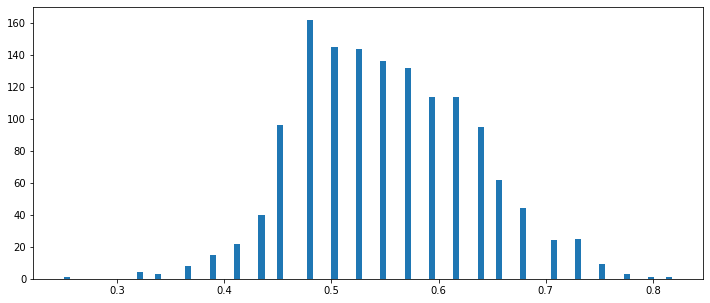

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(accuracy, 100)

# Performing same to get best accuracy models and save them

this can be done using dictionaries


# This part I'm working out.

In [84]:
X_train, X_test = X[:][train_index], X[:][test_index]
y_train, y_test = y[train_index], y[test_index]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43, 70) (43,)
(44, 70) (44,)


In [ ]:
scores = {aal: {model: best_accuracy, model2: best accuracy}, 2: {model: best_accuracy}}

In [ ]:
model_names = list()
best_score = list()

for i, nm in enumerate(df):
  best_score.append(accuracy_best)
  accuracy_best = list()

  ## Since there are only 14 types of parcellations in ReHo data, rest of the 
  ## variabes are not useful for classification

  if i > 13:
    pass
  else:
    print(i, nm)
    X = df.get(nm)
    y = np.array(df.get('diag_Code'))
    print(X.shape, y.shape)
    X = np.array(X)

    # Strafied Shuffle Split
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

    for train_index, test_index in sss.split(X, y):
      accuracy_best.append(accuracy.max)
      accuracy = [[]]


      print("TRAIN:", train_index[1:5], "TEST:", test_index[1:5])
      X_train, X_test = X[:][train_index], X[:][test_index]
      y_train, y_test = y[train_index], y[test_index]
      print(X_train.shape, y_train.shape)
      print(X_test.shape, y_test.shape)



      lr = LinearRegression()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = LogisticRegression()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = LogisticRegressionCV()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = DecisionTreeClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = RandomForestClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = GradientBoostingClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = KMeans()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = AgglomerativeClustering()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.fit_predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

      lr = SpectralClustering()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.fit_predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))


      lr = KNeighborsClassifier()
      clf = lr.fit(X_train, y_train)
      y_hat = clf.predict(X_test)
      y_hat = y_hat > 0
      model_names.append(lr.__class__.__name__)
      accuracy.append(accuracy_score(y_test, y_hat))
      print(lr.__class__.__name__, 'Accuracy Score: ',accuracy_score(y_test, y_hat))

In [54]:
X[:][1]

0    -1.379881
1    -0.774012
2     0.659692
3     0.391177
4    -1.272483
        ...   
82   -0.658905
83   -0.596178
84    1.649737
85    2.832984
86   -0.616909
Name: 1, Length: 87, dtype: float64

In [32]:
y.shape

(87,)

In [25]:
 X_train[1], y_train[1]

(0    -1.379881
 1    -0.774012
 2     0.659692
 3     0.391177
 4    -1.272483
         ...   
 82   -0.658905
 83   -0.596178
 84    1.649737
 85    2.832984
 86   -0.616909
 Name: 1, Length: 87, dtype: float64, 0)

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn

In [ ]:
!pip uninstall hunga-bunga
!pip install hunga-bunga

In [ ]:
!pip uninstall hunga-bunga
!pip install hunga-bunga

Uninstalling hunga-bunga-0.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/hunga_bunga-0.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/hunga_bunga/*
Proceed (y/n)? y
  Successfully uninstalled hunga-bunga-0.1
Processing /root/.cache/pip/wheels/e5/d7/7c/154325b2c53eba43f2b9bcaadf4b9c9de157e1e9316d398fed/hunga_bunga-0.1-cp36-none-any.whl


In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   206  100   206    0     0    513      0 --:--:-- --:--:-- --:--:--   512
  Using cached https://files.pythonhosted.org/packages/ed/0f/4d7e42a9dfef3a1898e03cffa8f1cfcd1f96507d718808b2db584c6f8401/pyrfr-0.8.0.tar.gz
  ERROR: Failed building wheel for pyrfr
  Running setup.py clean for pyrfr
Failed to build pyrfr
    Running setup.py install for pyrfr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-xxhkbk7j/pyrfr/setup.py'"'"'; __file__='"'"'/tmp/pip-install-xxhkbk7j/pyrfr/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-zomjv0q5/install-record.txt --single-version-exter

In [ ]:
!pip install hunga-bunga
!pip install auto-sklearn

     |████████████████████████████████| 4.6MB 2.7MB/s 
     |████████████████████████████████| 256kB 24.8MB/s 
     |████████████████████████████████| 10.4MB 26.4MB/s 
     |████████████████████████████████| 972kB 48.3MB/s 
     |████████████████████████████████| 296kB 46.8MB/s 
     |████████████████████████████████| 215kB 41.8MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.8.0-cp36-none-any.whl size=4842901 sha256=04c9d1ec16938c44ec35e6b45ca189175816ac4a4d1050f71fafd812895f703e
  Stored in directory: /root/.cache/pip/wheels/12/53/3a/288c5bab272d38177e5188e59525363bfeeb8fc6f1784ddb2e
  Created wheel for liac-arff: filename=liac_arff-2.4.0-cp36-none-any.whl size=13335 sha256=be84e5bbdae94d3eaaad9f933f99501528c7ed8a8b66924611730a9c1fa8416a
  Stored in directory: /root/.cache/pip/wheels/d1/6a/e7/529dc54d76ecede4346164a09ae3168df358945612710f5203
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.13-cp36-cp36m-linux_x86_64.whl size=2913479 sha256=1f9202a3ef9b209f02d

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(aal, y)
predictions = cls.predict(aal)


ModuleNotFoundError: ignored

In [ ]:
from hunga_bunga import HungaBungaClassifier, HungaBungaRegressor

clf = HungaBungaClassifier()
clf.fit(X, y)
clf.predict(X)

ModuleNotFoundError: ignored

In [ ]:
a = []
frames = []
mid = []
b = []
l = []
for i,x in enumerate(df):
  l = df.get(x)
  try:
    a = pd.DataFrame(l, columns=['{}-{}'.format(str(x),i) for i in range(l.shape[1])], index = ['{}'.format(i) for i in range(l.shape[0])] ).transpose()
  except:
    b = pd.DataFrame({x : l}).transpose()
  frames.append(a) 
  mid.append(b)
result = pd.concat(frames).transpose()
mid = pd.concat(mid[-5:]).transpose()

In [ ]:
a = []
frames = []
mid = []
b = []
l = []
for i,x in enumerate(df):
  l = df.get(x)
  try:
    a = pd.DataFrame(l, columns=['{}-{}'.format(str(x),i) for i in range(l.shape[1])], index = ['{}'.format(i) for i in range(l.shape[0])] ).transpose()
  except:
    b = pd.DataFrame({x : l}).transpose()
  frames.append(a) 
  mid.append(b)
result = pd.concat(frames).transpose()
mid = pd.concat(mid[-5:]).transpose()

,aal-0,aal-1,aal-2,aal-3,aal-4,aal-5,aal-6,aal-7,aal-8,aal-9,aal-10,aal-11,aal-12,aal-13,aal-14,aal-15,aal-16,aal-17,aal-18,aal-19,aal-20,aal-21,aal-22,aal-23,aal-24,aal-25,aal-26,aal-27,aal-28,aal-29,aal-30,aal-31,aal-32,aal-33,aal-34,aal-35,aal-36,aal-37,aal-38,aal-39,...,smith70-30,smith70-31,smith70-32,smith70-33,smith70-34,smith70-35,smith70-36,smith70-37,smith70-38,smith70-39,smith70-40,smith70-41,smith70-42,smith70-43,smith70-44,smith70-45,smith70-46,smith70-47,smith70-48,smith70-49,smith70-50,smith70-51,smith70-52,smith70-53,smith70-54,smith70-55,smith70-56,smith70-57,smith70-58,smith70-59,smith70-60,smith70-61,smith70-62,smith70-63,smith70-64,smith70-65,smith70-66,smith70-67,smith70-68,smith70-69
0,0.903504,-1.379881,1.815419,0.692680,3.219530,1.762107,1.002799,-1.537369,2.796549,0.593156,-0.255145,-2.527846,1.216521,-1.954173,3.158594,0.682909,-1.125890,-3.486496,-0.572924,-0.489566,2.271910,1.970850,0.654350,1.198993,1.852338,2.058460,2.447902,2.860240,0.170609,-3.189064,-0.076566,0.101435,-3.019396,-3.840099,-2.266207,-2.497234,1.306596,-1.818076,0.649514,-0.711509,...,-2.427312,-0.554650,1.343916,-0.837381,-0.585421,0.095032,-2.657656,1.210853,-3.428913,1.165785,0.996149,0.484851,-0.600837,-0.416758,-1.862204,0.822299,-0.543847,0.726232,0.366906,0.500763,-0.918343,-0.522601,0.985143,0.309880,0.199832,-1.995937,0.119034,1.910153,-0.794655,2.377925,0.742295,-2.176832,0.037749,1.221252,-0.051657,1.360693,-0.410199,1.106303,0.319606,-0.563350
1,-1.005250,-0.774012,0.297203,0.567038,-1.553331,2.111693,0.099713,-0.396241,-0.456515,1.884615,0.053794,0.694751,-0.233670,0.277691,0.492492,0.197456,0.372023,0.567832,0.492808,1.240741,-0.292228,1.023248,1.865757,1.119135,-0.889321,-1.299834,-1.373710,-0.191514,-1.253117,0.937337,1.580214,1.032260,3.396746,3.421665,2.736670,1.789535,1.085319,0.268563,0.857363,-0.616249,...,1.667381,0.039795,-0.266618,-0.467590,1.485558,2.253628,-1.316971,-1.374695,1.044823,0.780941,-0.056501,-0.803732,0.009191,-0.119740,-0.108351,-0.571004,-0.528105,0.232451,0.187104,0.771036,-0.493726,-1.115443,-1.467692,-0.508843,0.227144,-1.739882,-0.466618,0.436533,-1.091325,-0.478555,0.963358,-0.651643,0.344092,-0.720894,-0.103521,-0.989457,-0.054083,0.692951,0.758725,2.094716
2,-0.570857,0.659692,-0.606319,-0.922331,-0.181489,-0.669323,0.116768,-0.543971,-0.314008,-0.697251,-0.075673,0.683390,-0.147586,0.520724,-0.031966,-0.642244,0.154361,0.324440,-0.015973,-0.926121,-0.599857,-0.093675,0.623150,-0.614754,0.073104,-0.467231,-0.773465,-0.761976,-0.262380,0.909204,0.017039,1.220186,1.799216,1.397674,2.207531,2.049861,0.404792,2.200704,-0.664651,0.958330,...,2.164942,0.307878,0.289513,-2.400427,0.365596,1.162806,1.063170,-0.448974,0.763081,0.772512,-0.527502,-0.335754,-0.391964,0.484197,0.680536,0.811878,-1.409013,0.922239,-0.927589,-1.019495,1.620049,-1.254732,-2.686923,0.599103,1.427806,-1.400661,-0.378462,0.058362,-0.674884,-0.929798,-0.535746,-1.361229,-0.840150,-0.495494,-2.824020,1.071420,0.077578,-1.415780,0.413741,-1.012781
3,2.136987,0.391177,1.662034,0.496431,0.327838,-1.019523,0.703860,0.978327,0.115359,-0.414599,0.405612,-0.298265,0.829553,-0.606347,-0.580319,-0.308852,1.083191,0.408381,0.829244,1.129986,-0.512760,-0.323033,-0.640646,0.558617,-0.699157,-0.590015,-0.699474,-0.151121,-0.085373,0.177244,-0.563481,-0.552638,0.490241,0.789883,1.422918,1.493045,-0.300187,-0.277215,-0.882102,-0.600840,...,0.931024,-1.324186,1.635245,-0.423677,2.494555,0.569088,1.230374,0.222765,-0.841565,-1.671298,1.092262,-0.016988,0.120991,1.273939,0.572872,0.900999,1.052675,0.656173,-0.753558,-0.155229,0.371567,-1.211342,0.267750,-0.397498,-0.856035,1.443539,2.148654,-0.364822,0.197688,-0.044174,-0.030769,0.612792,0.157824,-0.585255,-0.669572,0.511266,1.128935,-0.203844,0.291813,0.700964
4,-1.057269,-1.272483,1.042172,0.293039,0.152190,0.489288,1.309904,-0.029723,0.527069,1.120779,-1.050842,0.219766,-0.193377,1.751008,-0.023067,1.201970,-1.209234,-0.256214,0.078142,0.065287,-1.358339,-1.020540,2.362678,1.541697,-0.

In [ ]:
mid = mid.reset_index()
mid['index'] = mid['index'].astype(int)
result = result.reset_index()
result['index'] = result['index'].astype(int)
result1 = mid.join(result.set_index('index'), on='index')

In [ ]:
result1.to_csv('/content/drive/My Drive/Datasets/Schizophrenia and Bipolar Disorder Classification/data.csv')